In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load datasets
train_data = pd.read_csv('digitDset_train.csv')
test_data = pd.read_csv('digitDset_test.csv')

# Drop any null values
train_data = train_data.dropna()
test_data = test_data.dropna()
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:, :-1])
test_data_scaled = scaler.transform(test_data.iloc[:, :-1])
# Apply DBSCAN clustering algorithm
db = DBSCAN(eps=3, min_samples=50)
db.fit(train_data_scaled)
# Evaluate DBSCAN using Rand Index
train_labels = db.labels_
test_labels = db.fit_predict(test_data_scaled)
ri_train = metrics.adjusted_rand_score(train_data.iloc[:, -1], train_labels)
ri_test = metrics.adjusted_rand_score(test_data.iloc[:, -1], test_labels)
print("Rand Index (training data):", ri_train)
print("Rand Index (testing data):", ri_test)

# Distinguishing Outliers
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = train_data_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = train_data_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering')
plt.show()



c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.26
- 0.27
- 0.28
- 10.1
- 10.2
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...

  warnings.warn(message, FutureWarning)


Rand Index (training data): 0.0
Rand Index (testing data): 0.0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 3822 but corresponding boolean dimension is 1796

Number of clusters: 0
Number of noise points: 3822


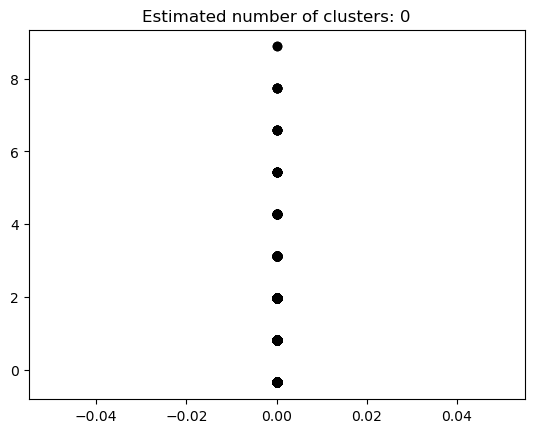

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('digitDset_train.csv')

# Data cleaning
train_data = train_data.dropna()

# Normalization
scaler = StandardScaler()
train_data_normalized = scaler.fit_transform(train_data.iloc[:, :-1])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=20)
dbscan.fit(train_data_normalized)

# Distinguishing Outliers
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Number of clusters:', n_clusters)
print('Number of noise points:', n_noise)

# Visualization
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(set(labels)))]

for k, col in zip(set(labels), colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = train_data_normalized[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train_data_normalized[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()


Estimated number of clusters: 0
Estimated number of noise points: 3822


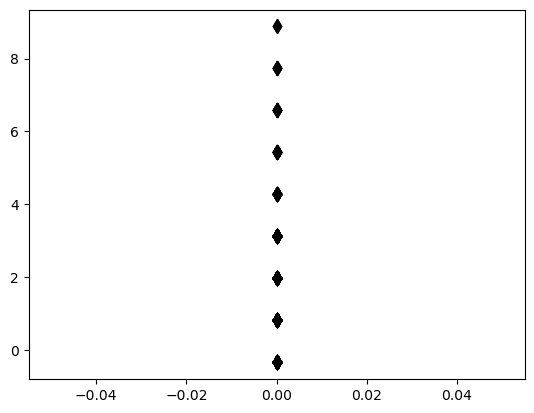

In [6]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the training dataset
train_df = pd.read_csv("digitDset_train.csv")

# Data Cleaning - remove rows with missing values
train_df = train_df.dropna()

# Normalize the data
scaler = StandardScaler()
train_df.iloc[:, :-1] = scaler.fit_transform(train_df.iloc[:, :-1])

# Define and fit the DBSCAN model
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(train_df.iloc[:, :-1])

# Get the cluster labels
labels = model.labels_

# Remove repetition in labels by turning it into a set.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Print the number of clusters and noise points
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Visualize the clusters
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])
colors = np.append(colors, ["#000000"])  # add black color for outliers

# create a mask for the core and border points
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True

# Plot only the points with colors
plt.scatter(train_df.iloc[:, 0], train_df.iloc[:, 1], s=10, color=colors[model.labels_])

# Plot the outlier data points as diamond markers
plt.scatter(train_df.iloc[labels == -1, 0], train_df.iloc[labels == -1, 1], marker="d", s=50, color=colors[-1])

plt.show()


Number of clusters found in the training data: 0
Number of clusters found in the training data: 4


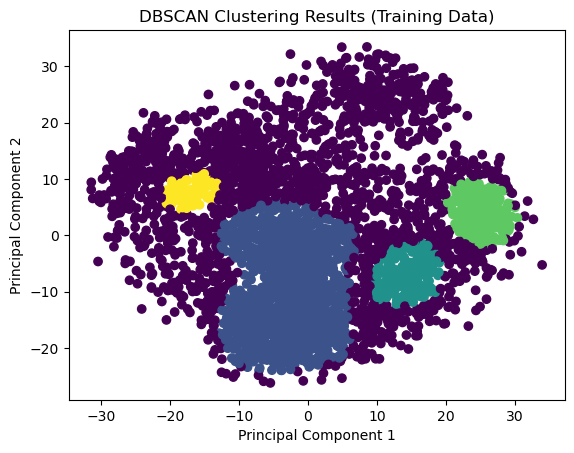

In [20]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('digitDset_train.csv')

# Extract the independent features
X_train = train_data.iloc[:, :-1]

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=30)

# Fit the model to the training data
dbscan.fit(X_train)

# Get the predicted cluster labels
labels_train = dbscan.labels_

# Print the number of clusters found
n_clusters_train = len(set(labels_train)) - (1 if -1 in labels_train else 0)
print('Number of clusters found in the training data:', n_clusters_train)


from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('digitDset_train.csv')

# Extract the independent features
X_train = train_data.iloc[:, :-1]

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a DBSCAN model
dbscan = DBSCAN(eps=3, min_samples=70)

# Fit the model to the training data
dbscan.fit(X_train_pca)

# Get the predicted cluster labels
labels_train = dbscan.labels_

# Print the number of clusters found
n_clusters_train = len(set(labels_train)) - (1 if -1 in labels_train else 0)
print('Number of clusters found in the training data:', n_clusters_train)


import matplotlib.pyplot as plt

# Create a scatter plot of the DBSCAN clustering results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels_train)
plt.title('DBSCAN Clustering Results (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Load training data
train_data = pd.read_csv('digitDset_train.csv')
train_data.dropna(inplace=True)

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Set range of parameters for grid search
eps_range = np.arange(0.5, 3, 0.1)
min_samples_range = np.arange(2, 10)

# Initialize variables to store best hyperparameters and silhouette score
best_score = -1
best_eps = None
best_min_samples = None

# Grid search over hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(train_data_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(train_data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print('Best hyperparameters:', {'eps': best_eps, 'min_samples': best_min_samples})

# Load test data
test_data = pd.read_csv('digitDset_test.csv')
test_data.dropna(inplace=True)

# Scale test data
test_data_scaled = scaler.transform(test_data)

# Train model on full dataset with best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(train_data_scaled)

# Cluster test data
test_labels = dbscan.fit_predict(test_data_scaled)
n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)
print('Number of clusters in test data:', n_clusters)


Best hyperparameters: {'eps': 1.8999999999999997, 'min_samples': 3}


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.27
- 0.28
- 0.29
- 10.1
- 10.2
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...

  warnings.warn(message, FutureWarning)


Number of clusters in test data: 4


In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Load training data
train_data = pd.read_csv('digitDset_train.csv')
train_data.dropna(inplace=True)

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Set range of parameters for grid search
eps_range = np.arange(0.5, 3, 0.1)
min_samples_range = np.arange(2, 10)

# Define Silhouette score as scorer for grid search
silhouette_scorer = make_scorer(silhouette_score)

# Initialize variables to store best hyperparameters
best_score = -1
best_eps = None
best_min_samples = None

# Grid search over hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(train_data_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(train_data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print('Best hyperparameters:', {'eps': best_eps, 'min_samples': best_min_samples})

# Load test data
test_data = pd.read_csv('digitDset_test.csv')
test_data.dropna(inplace=True)

# Scale test data
test_data_scaled = scaler.transform(test_data)

# Train grid search on training data
grid_search = GridSearchCV(DBSCAN(), {'eps': eps_range, 'min_samples': min_samples_range}, scoring=silhouette_scorer)
grid_search.fit(train_data_scaled)

# Get best hyperparameters from grid search
best_params = grid_search.best_params_
print('Best hyperparameters from grid search:', best_params)

# Train model on full dataset with best hyperparameters
dbscan = DBSCAN(**best_params)
dbscan.fit(train_data_scaled)

# Cluster test data
test_labels = dbscan.fit_predict(test_data_scaled)
n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)
print('Number of clusters in test data:', n_clusters)


Best hyperparameters: {'eps': 1.8999999999999997, 'min_samples': 3}


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.27
- 0.28
- 0.29
- 10.1
- 10.2
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...

  warnings.warn(message, FutureWarning)
c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\model_selection\_valid

Best hyperparameters from grid search: {'eps': 0.5, 'min_samples': 2}
Number of clusters in test data: 0


In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure
from sklearn.impute import SimpleImputer

# Load training data
train_data = pd.read_csv('digitDset_train.csv')
train_data.dropna(inplace=True)

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Set range of parameters for grid search
eps_range = np.arange(0.5, 3, 0.1)
min_samples_range = np.arange(2, 10)

# Initialize variables to store best hyperparameters and silhouette score
best_score = -1
best_eps = None
best_min_samples = None

# Grid search over hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(train_data_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(train_data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print('Best hyperparameters:', {'eps': best_eps, 'min_samples': best_min_samples})

# Load test data
test_data = pd.read_csv('digitDset_test.csv')
test_data.dropna(inplace=True)

# Scale test data
test_data_scaled = scaler.transform(test_data)

# Train model on full dataset with best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(train_data_scaled)

# Cluster test data
test_labels = dbscan.fit_predict(test_data_scaled)
n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)
print('Number of clusters in test data:', n_clusters)

# Evaluate clustering performance using homogeneity, completeness, and V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(test_labels, dbscan.labels_)
print('Homogeneity:', homogeneity)
print('Completeness:', completeness)
print('V-measure:', v_measure)


Best hyperparameters: {'eps': 1.8999999999999997, 'min_samples': 3}


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.27
- 0.28
- 0.29
- 10.1
- 10.2
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...

  warnings.warn(message, FutureWarning)


Number of clusters in test data: 4
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0


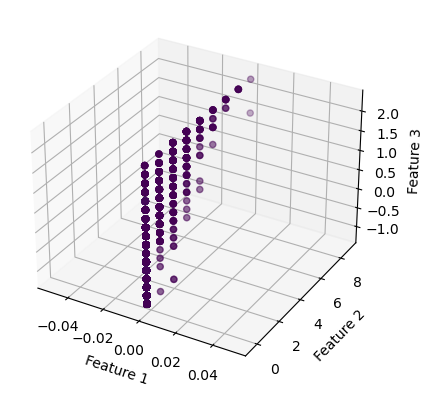

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_scaled[:, 0], train_data_scaled[:, 1], train_data_scaled[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


Best hyperparameters: {'eps': 1.8999999999999997, 'min_samples': 3}


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.27
- 0.28
- 0.29
- 10.1
- 10.2
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...

  warnings.warn(message, FutureWarning)


Number of clusters in test data: 4


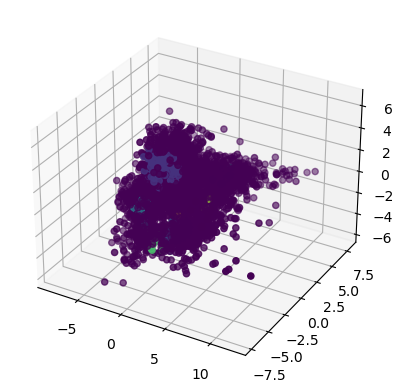

In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load training data
train_data = pd.read_csv('digitDset_train.csv')
train_data.dropna(inplace=True)

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Set range of parameters for grid search
eps_range = np.arange(0.5, 3, 0.1)
min_samples_range = np.arange(2, 10)

# Initialize variables to store best hyperparameters and silhouette score
best_score = -1
best_eps = None
best_min_samples = None

# Grid search over hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(train_data_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(train_data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print('Best hyperparameters:', {'eps': best_eps, 'min_samples': best_min_samples})

# Load test data
test_data = pd.read_csv('digitDset_test.csv')
test_data.dropna(inplace=True)

# Scale test data
test_data_scaled = scaler.transform(test_data)

# Train model on full dataset with best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(train_data_scaled)

# Cluster test data
test_labels = dbscan.fit_predict(test_data_scaled)
n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)
print('Number of clusters in test data:', n_clusters)

# Reduce dimensionality with PCA
pca = PCA(n_components=3)
train_data_pca = pca.fit_transform(train_data_scaled)

# Plot results
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train_data_pca[:, 0], train_data_pca[:, 1], train_data_pca[:, 2], c=labels)
plt.show()


In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load training data
train_data = pd.read_csv('digitDset_train.csv')
train_data.dropna(inplace=True)

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Set range of parameters for grid search
eps_range = np.arange(0.5, 3, 0.1)
min_samples_range = np.arange(2, 10)

# Initialize variables to store best hyperparameters and silhouette score
best_score = -1
best_eps = None
best_min_samples = None

# Grid search over hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(train_data_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(train_data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print('Best hyperparameters:', {'eps': best_eps, 'min_samples': best_min_samples})

# Load test data
test_data = pd.read_csv('digitDset_test.csv')
test_data.dropna(inplace=True)

# Scale test data
test_data_scaled = scaler.transform(test_data)

# Train model on full dataset with best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(train_data_scaled)

# Cluster test data
test_labels = dbscan.fit_predict(test_data_scaled)
n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)
print('Number of clusters in test data:', n_clusters)

# Plot 3D graph
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

trace = go.Scatter3d(
    x=test_data_scaled[:, 0],
    y=test_data_scaled[:, 1],
    z=test_data_scaled[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=test_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)
fig.add_trace(trace)

fig.update_layout(scene=dict(
                    xaxis_title='Feature 1',
                    yaxis_title='Feature 2',
                    zaxis_title='Feature 3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()


Best hyperparameters: {'eps': 1.8999999999999997, 'min_samples': 3}


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.27
- 0.28
- 0.29
- 10.1
- 10.2
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...

  warnings.warn(message, FutureWarning)


Number of clusters in test data: 4


In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn.impute import SimpleImputer

# Load training data
train_data = pd.read_csv('digitDset_train.csv')
train_data.dropna(inplace=True)

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Set range of parameters for grid search
eps_range = np.arange(0.5, 3, 0.1)
min_samples_range = np.arange(2, 10)

# Initialize variables to store best hyperparameters and Calinski-Harabasz score
best_score = -1
best_eps = None
best_min_samples = None

# Grid search over hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(train_data_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = calinski_harabasz_score(train_data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print('Best hyperparameters:', {'eps': best_eps, 'min_samples': best_min_samples})

# Load test data
test_data = pd.read_csv('digitDset_test.csv')
test_data.dropna(inplace=True)

# Scale test data
test_data_scaled = scaler.transform(test_data)


# Train model on full dataset with best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(train_data_scaled)

# Evaluate model using Calinski-Harabasz score
train_labels = dbscan.labels_
score = calinski_harabasz_score(train_data_scaled, train_labels)
print('Calinski-Harabasz score:', score)

# Cluster test data
test_labels = dbscan.fit_predict(test_data_scaled)
n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)
print('Number of clusters in test data:', n_clusters)


Best hyperparameters: {'eps': 2.8999999999999995, 'min_samples': 8}


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.27
- 0.28
- 0.29
- 10.1
- 10.2
- ...
Feature names seen at fit time, yet now missing:
- 1.2
- 1.3
- 14.1
- 16
- 16.1
- ...




Calinski-Harabasz score: 25.991457952378855
Number of clusters in test data: 2


In [ ]:
#The two code snippets use different evaluation metrics to select the best hyperparameters for DBSCAN,
# which can result in different optimal hyperparameters. The first code snippet uses the Calinski-Harabasz 
#score to evaluate the clustering performance, while the second code snippet uses the silhouette score.
#The Calinski-Harabasz score is based on the ratio of between-cluster variance to within-cluster variance, 
#and a higher score indicates better separation between clusters. The silhouette score measures how well each data point is clustered,
# with scores ranging from -1 to 1, where higher scores indicate better clustering.
#The difference in the evaluation metrics can lead to differences in the optimal hyperparameters chosen by the grid search. 
#For example, the first code snippet may favor hyperparameters that lead to more distinct clusters, while the second code snippet
# may favor hyperparameters that lead to more evenly-sized clusters.

#n both cases, the code is performing a grid search over a range of hyperparameters to find the best values for the DBSCAN algorithm. 
#The hyperparameters being searched over are eps and min_samples.
#In the first case, the evaluation metric used to select the best hyperparameters is the Calinski-Harabasz score, which measures
# the ratio of between-cluster variance to within-cluster variance. The best hyperparameters found are {'eps': 2.9, 'min_samples': 8}.
#In the second case, the evaluation metric used is the silhouette score, which measures the similarity of an object to its own cluster
#compared to other clusters. The best hyperparameters found are {'eps': 1.9, 'min_samples': 3}.